### Student Information
Name:李緯倫

Student ID:109062109

GitHub ID:waylon620

Kaggle name:waylon0620 (Team name: 828-CWZ)

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [34]:
### Begin Assignment Here

# Part One: Take home exercises

In [35]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
# train_df.head()

train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

#### Exercise 1:

In [36]:
# Answer here
import numpy as np
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_count = count_vect.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix

term_frequencies = np.asarray(X_count.sum(axis=0))[0]

term=[]
freq=[]

for i , j in zip(count_vect.get_feature_names_out(),term_frequencies):
    if j>200:
        term.append(i)
        freq.append(j)
   
sort_data = sorted(list(zip(freq, term)), reverse=True)

top_30_data = sort_data[:30]

freq, term = zip(*top_30_data)

fig = px.bar(x=term,y=freq)

# showing the plot
fig.show()

#### Exercise 2:

In [37]:
# Answer here
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_features = 1000, tokenizer=nltk.word_tokenize)
tfidf_vectorizer.fit(train_df["text"])

feature_names = tfidf_vectorizer.get_feature_names_out()
print(feature_names[100:110])

c:\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']


#### Exercise 3:

# Answer here
# Yes, the diagonal line means the correct prediction, and the others we can know what the wrong answer we predict for other classes. 

#### Exercise 4:

In [38]:
from sklearn.tree import DecisionTreeClassifier
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [39]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_train)
y_pred_nb_test = nb_classifier.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_nb)
acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_nb_test)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


report = classification_report(y_true=y_test, y_pred=y_pred_nb_test)

print("Classification Report:\n", report)

cm = confusion_matrix(y_true=y_test, y_pred=y_pred_nb_test) 
print(cm)

training accuracy: 0.79
testing accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


#### Exercise 5:

#### The testing accuracy did not have a lot difference : Decision Tree model got 0.68 and the Naive Bayes model got 0.7. But the training accuracy of Decision Tree model is much higher than the Naive Bayes model. Which is 0.99 for the Decision Tree model and 0.79 for the Naive Bayes model.
#### It means that the Decision Tree has the overfitting problem, since we didn't set any parameters to the Decision Tree model, the default of min_samples_leaf is 1 and max_depth is not limited, so there will easily happen the overfitting issue. 
#### The Naive Bayes model did not have the overfitting problem may because of the model has a more simple and general structure.

#### Exercise 6:

In [40]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [41]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2975    sadness
1293       fear
575       anger
2029        joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


C:\Users\user\AppData\Local\Temp\ipykernel_7536\393062722.py:9: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



In [42]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

input_shape:  500
output_shape:  4
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_6 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_4 (ReLU)              (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_5 (ReLU)              (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 4)                 260       
                                                                 
 softmax_2 (Softmax)    

In [44]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
 43/113 [==========>...................] - ETA: 0s - loss: 1.1350 - accuracy: 0.5894

113/113 [==============================] - 0s 2ms/step - loss: 0.9975 - accuracy: 0.6446 - val_loss: 0.9277 - val_accuracy: 0.6772
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.7877 - val_loss: 0.7836 - val_accuracy: 0.6945
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8456 - val_loss: 0.8232 - val_accuracy: 0.6888
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8732 - val_loss: 0.8420 - val_accuracy: 0.6916
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2825 - accuracy: 0.9017 - val_loss: 0.8953 - val_accuracy: 0.6859
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.9181 - val_loss: 0.9029 - val_accuracy: 0.6744
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9344 - val_loss: 1.0092 - val_accuracy: 0.6657
Epoch 8/25
113/11

In [45]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

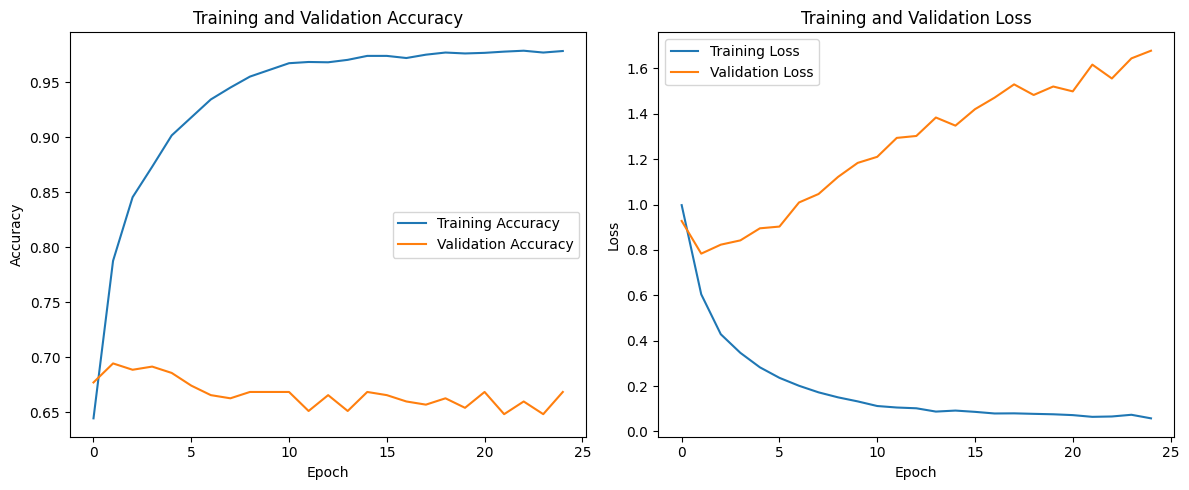

In [46]:
# Answer here
import matplotlib.pyplot as plt

# Your data in a DataFrame
data = {
    "epoch": training_log.epoch,
    "accuracy": training_log.accuracy,
    "loss":training_log.loss,
    "val_accuracy": training_log.val_accuracy,
    "val_loss": training_log.val_loss
}

# Extract data for plotting
epochs = data["epoch"]
accuracy = data["accuracy"]
loss = data["loss"]
val_accuracy = data["val_accuracy"]
val_loss = data["val_loss"]

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(121)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(122)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#### Exercise 7:

# Answer here
### I think what I need to do is to transform word vectors to sentence vector for each sentence. Use the TF-IDF method to choose the important word of the sentence and use the combination of important words' vector to represent the sentence vector. Then we can evaluate by calculating the similarity of vectors from different sentences.  

### I want to observe the constitution of a sentence and find out maybe the order of words or the conbination of words.

#### Exercise 8:

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [50]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', happy_words)
print('happy_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
happy_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

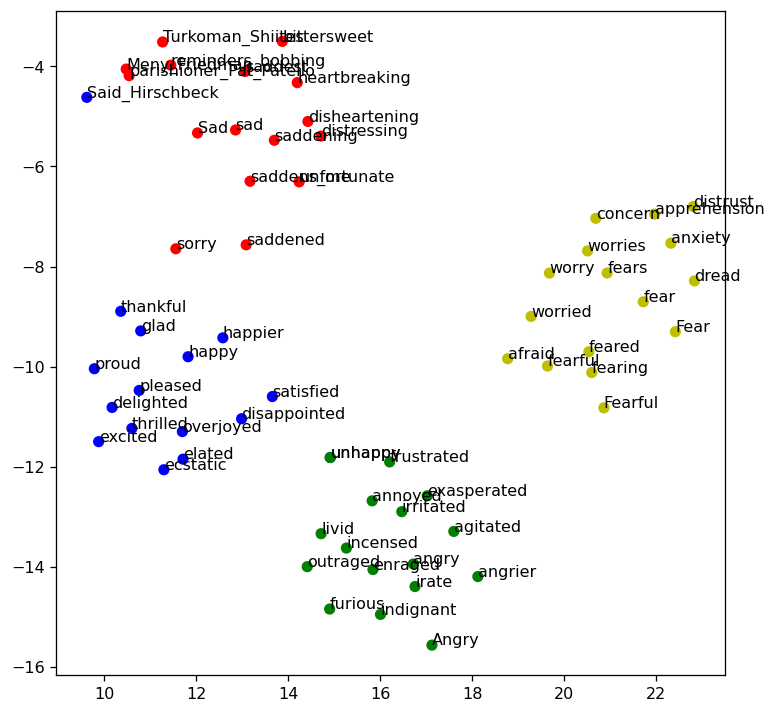

In [51]:
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Part 3 Report

##### preprocess: 
1. I read the json file as pandas format, and took the ['source_tweet_source_tweet_id', 'source_tweet_source_text'] column.
2. I remane the column as ['tweet_id', 'text']. Then I merge the df with the emotion df and data_identification df, since thwy have the same column named "tweet_id", I can easily merge them.
3. Next, I extract the training ids for my training data.

##### training:
First, I only use an basic Naive Bayes Classifier with TfidfVectorizer, and it came out with the score of 0.371.
Next, I tried decision tree with different word tokenizers, I also tuned the hyperparameters like random_state, min_samples_leaf, max_depth but the outcome result did not improve which was 0.360.

So, I started to find some classifing models online, then I found the one on Hugging Face called "j-hartmann/emotion-english-distilroberta-base". Surprisingly, the catagories are mostly the same as our dataset, so I thought I can combine the model's result and my own model's result.

Next, I tested the Hugging Face model, it has the categories of : anger 🤬,disgust 🤢,fear 😨,joy 😀,neutral 😐,sadness 😭, surprise 😲. So if the output is "neutral" , I need to classify it into "anticipation" or "trust". I chosoed some key verbs of anticipation, for example: ['anticipate','anticipat' ,'hop', 'hope', 'yearn', 'crave', 'envision', 'wish', 'aspire'] (the reason why i need to add the keywords 'anticipat' ,'hop' is that the lemmatizer sometimes will not have the correct word result), and i do the tokenization, pos_tag and lemmatization on the tweet text, if the text contains the keywords, then i will classify it as "anticipation", otherwise it will be "trust". Sadly, the result was only 0.199.

Lastly, I merge the two submissions (Naive Bayes and Hugging Face model). If the Hugging Face model predict "neutral" than I will take the Naive Bayes prediction, otherwise just use the Hugging Face model prediction. And the result is still only 0.2577.

In conclusion, I think there are some reason why the Hugging Face model did not perform well:
Some of the texts did not have a complete sentence or expression, so it is hard to find out the real emotions.
The dataset is from the social media so there are many new words, fashionble words or abbreviations that is not in the training data of Hugging Face model. 

My code is in the "model.ipynb" file and the Hugging Face link is : https://huggingface.co/j-hartmann/emotion-english-distilroberta-base?text=I+trusted+and+waited+and+in+due+time+God+gave+me+his+answer+%3B+my+vision+is+made+clear.

